# データの読み込み
## 目的変数と説明変数
- 目的変数:予測したい値（y）
- 説明変数:目的変数を予測するために必要な値（X）

In [1]:
import pandas as pd

df = pd.read_csv('input/automobile_converted.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,1,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,1,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
# 説明変数(price以外が対象)
X_var = df.drop("price" ,axis=1)
X_array = X_var.values

# 目的変数
y_var = df["price"]
y_array = y_var.values

# 訓練データとテストデータ

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.8, random_state=0)

# 線形回帰で機械学習

In [33]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
print("傾き:%s" % model.coef_)
print("切片:%s" % model.intercept_)

傾き:[ 3.36140524e+02 -1.65912930e+00  4.17162656e+02 -1.27108594e+04
 -1.94860719e+02 -4.29174700e+03 -1.26729033e+03  3.55208676e+02
  2.51997883e+04  4.50389792e+02 -3.87403953e+02  7.18320608e+02
 -1.08128448e+03  1.96685862e+01  1.19055822e+03  2.15195112e+02
 -2.61130570e+00 -8.67948559e+02 -2.00978235e+03  1.28766717e+03
 -9.51538408e+02 -5.86720302e+01  4.68186403e+00  9.01444751e+02
 -9.19232037e+02]
切片:8074.284519431143


# モデル評価

In [35]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9800836795057817
0.15598513124123448


# 学習済みモデルで予測

In [36]:
model.predict([X_test[0]])

array([-1783.1337078])

In [26]:
y_test[0]

np.float64(6795.0)

# 決定木でのモデル作成

In [37]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [38]:
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

0.964646102533162
0.7503764248280493


# 決定木描画

In [39]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

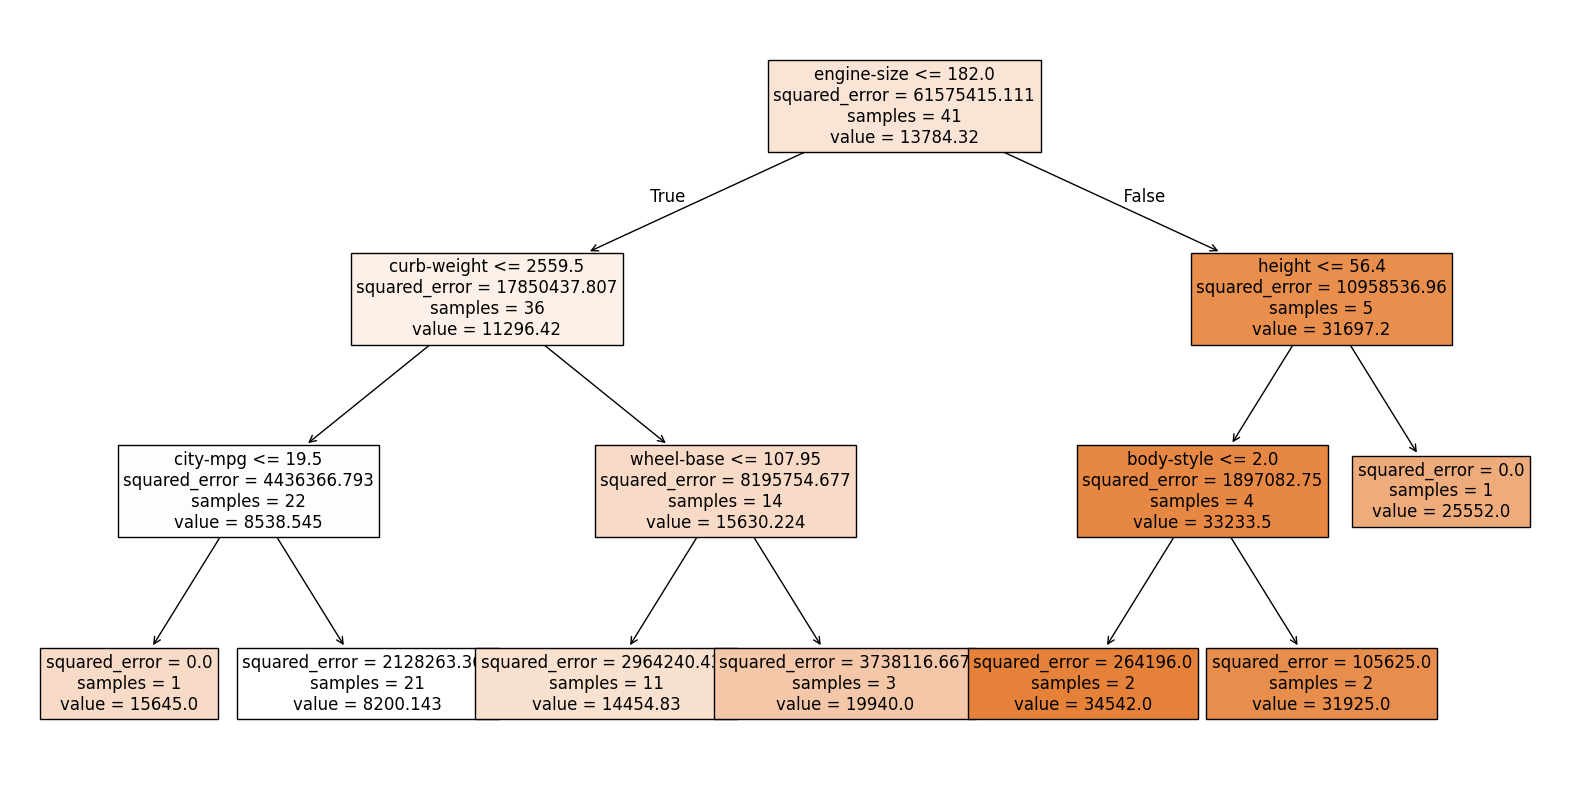

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(dtr, label="all", max_depth=3, filled=True, feature_names=df.columns, fontsize=12)
plt.show()

# ランダムフォレストでのモデル作成

In [41]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50, max_depth=3)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=50)

In [42]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9431046556050374
0.8044267280685027


# XGBoostでのモデル作成

In [43]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=50, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

C:\Users\ut122\PycharmProjects\testProject\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [44]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9999999737402804
0.7775918655829701


# Pycaretによるオートマシンラーニング

In [4]:
train = df.sample(frac=0.8, random_state=111)
test = df.drop(train.index)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

print("train:" + str(train.shape))
print("test:" + str(test.shape))

train:(164, 26)
test:(41, 26)


In [5]:
from pycaret.regression import *
reg01 = setup(data=train, target='price')

,Description,Value
0,Session id,3286
1,Target,price
2,Target type,Regression
3,Original data shape,"(164, 26)"
4,Transformed data shape,"(164, 26)"
5,Transformed train set shape,"(114, 26)"
6,Transformed test set shape,"(50, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [6]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:27:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1689.0484,5749170.2085,2294.4781,0.7743,0.1727,0.1339,0.0240
gbr,Gradient Boosting Regressor,1786.5916,5885409.6939,2356.7992,0.7739,0.1831,0.1451,0.0110
ada,AdaBoost Regressor,1877.2311,6027371.5911,2370.8711,0.7710,0.1931,0.1660,0.0110
et,Extra Trees Regressor,1808.9368,5906856.6996,2377.4183,0.7662,0.1777,0.1436,0.0170
xgboost,Extreme Gradient Boosting,1943.6079,7043131.7750,2541.5007,0.7158,0.2006,0.1574,0.5420
br,Bayesian Ridge,2219.2095,9514703.7094,2953.9761,0.6306,0.2236,0.1735,0.0050
en,Elastic Net,2309.1225,8974295.9901,2908.3168,0.6089,0.2431,0.1910,0.0050
dt,Decision Tree Regressor,2221.9993,9062086.9441,2940.6673,0.5790,0.2206,0.1704,0.0050
huber,Huber Regressor,2315.3164,11656082.2787,3259.1912,0.5767,0.2216,0.1702,0.0070
knn,K Neighbors Regressor,2535.3648,13760023.5500,3523.8246,0.5469,0.2281,0.1879,0.0130


In [7]:
model = create_model("et")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:28:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1994.5205,7523514.3335,2742.9025,0.8917,0.2021,0.1553
1,1356.9436,3783974.8898,1945.2442,0.5817,0.1282,0.1047
2,2346.8508,7632296.6000,2762.6611,0.9195,0.2807,0.2601
3,1769.7076,5857851.4537,2420.2999,0.9114,0.1478,0.1207
4,2364.5306,7601926.6529,2757.1592,0.8168,0.1863,0.1734
5,2626.6326,10864413.3626,3296.1210,0.4408,0.2879,0.1879
6,1020.2548,2583809.5742,1607.4233,0.8067,0.1349,0.1001
7,1737.7860,6011123.5991,2451.7593,0.9134,0.1326,0.1070
8,1535.5188,4031040.3737,2007.7451,0.5736,0.1440,0.1158


In [8]:
tuned = tune_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:29:08
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1889.6815,7188740.7699,2681.1827,0.8965,0.1718,0.1347
1,1422.6342,3925321.2326,1981.2423,0.5661,0.1331,0.1123
2,2280.9147,9196916.3590,3032.6418,0.9030,0.1926,0.1844
3,1924.7679,8007709.7785,2829.7897,0.8788,0.1507,0.1168
4,1736.3899,5270479.9439,2295.7526,0.8730,0.1795,0.1470
5,2546.6469,10766731.0276,3281.2697,0.4458,0.2749,0.1797
6,1050.7200,3054435.8226,1747.6944,0.7715,0.1391,0.1053
7,2081.0486,10919069.7491,3304.4016,0.8427,0.1545,0.1179
8,1601.6456,4911356.1487,2216.1580,0.4805,0.1507,0.1183


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
final = finalize_model(tuned)
print(final)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['symboling', 'normalized-losses',
                                             'make', 'fuel-type', 'aspiration',
                                             'num-of-doors', 'body-style',
                                             'drive-wheels', 'engine-location',
                                             'wheel-base', 'length', 'width',
                                             'height', 'curb-weight',
                                             'engine-type', 'num-of-cylinders',
                                             'engine-size', 'fuel-system',
                                             'bore', 'stroke',
                                             'compression-ratio', 'horsepower',
                                             'peak-rpm', 'city-mpg',
                                             'highway-mpg'],
                                 

In [12]:
test_predictions = predict_model(final, data=test)
test_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1570.6416,5425116.7265,2329.1880,0.9227,0.1433,0.1116


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction_label
0,2,164.0,1,1,0,1,3,0,0,99.400002,...,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,15312.920625
1,1,122.0,1,1,0,1,4,1,0,105.800003,...,5,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,17701.531289
2,2,192.0,2,1,0,2,3,2,0,101.199997,...,5,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,16153.540000
3,0,188.0,2,1,0,2,3,2,0,101.199997,...,5,3.31,3.19,9.0,121.0,4250.0,21,28,20970.0,16222.485000
4,0,188.0,2,1,0,1,3,2,0,101.199997,...,5,3.31,3.19,9.0,121.0,4250.0,21,28,21105.0,16603.820000


In [13]:
save_model(final, "output/automobile_final")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['symboling', 'normalized-losses',
                                              'make', 'fuel-type', 'aspiration',
                                              'num-of-doors', 'body-style',
                                              'drive-wheels', 'engine-location',
                                              'wheel-base', 'length', 'width',
                                              'height', 'curb-weight',
                                              'engine-type', 'num-of-cylinders',
                                              'engine-size', 'fuel-system',
                                              'bore', 'stroke',
                                              'compression-ratio', 'horsepower',
                                              'peak-rpm', 'city-mpg',
                                              'highway-mpg'],
                   

In [14]:
model = load_model("output/automobile_final")

data =  [[2.0, 164.0, 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 99.4, 176.6, 66.4, 54.3, 
2824.0, 3.0, 1.0, 136.0, 5.0, 3.19, 3.4, 8.0, 115.0, 5500.0, 18.0, 22.0]]

columuns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

df = pd.DataFrame(data, columns=columuns)
predictions = predict_model(model, df)
print("predicted price: %i" % predictions[["prediction_label"]].values[0][0])

Transformation Pipeline and Model Successfully Loaded


predicted price: 15312
